# This notebook is part of section 6.1

## Import the libraries

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.metrics import silhouette_score
import os
%matplotlib inline

## Fix the path

In [7]:
os.chdir('D:')
os.getcwd()

'D:\\'

## Import the dataset

In [9]:
data=pd.read_csv('daily_weather.csv',index_col=['number'])

## Drop Missing data

In [11]:
data.dropna(inplace=True)

## Describe the data

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
air_pressure_9am,1064.0,918.903180,3.179040,907.990000,916.595376,918.942281,921.169054,929.320000
air_temp_9am,1064.0,65.022609,11.168033,36.752000,57.398000,65.778479,73.530872,98.906000
avg_wind_direction_9am,1064.0,142.306756,69.149472,15.500000,65.979244,165.937461,191.100000,343.400000
avg_wind_speed_9am,1064.0,5.485793,4.534427,0.693451,2.245529,3.869906,7.264463,23.554978
max_wind_direction_9am,1064.0,148.480424,67.154911,28.900000,76.335351,176.350000,201.125000,312.200000
max_wind_speed_9am,1064.0,6.999714,5.590790,1.185578,3.064608,4.943637,8.747888,29.840780
rain_accumulation_9am,1064.0,0.182023,1.534493,0.000000,0.000000,0.000000,0.000000,24.020000
rain_duration_9am,1064.0,266.393697,1503.092216,0.000000,0.000000,0.000000,0.000000,17704.000000
relative_humidity_9am,1064.0,34.077440,25.356668,6.090000,15.093365,23.135000,44.660000,92.620000
relative_humidity_3pm,1064.0,35.148381,22.365475,5.300000,17.360468,24.371286,51.922500,92.250000


## Scale the Features using StandardScaler

In [15]:
X = StandardScaler().fit_transform(data)

## Elbow Method

In [17]:
K=range(2,15)
np.random.seed(42)
sse={}
for k in K:
    cluster_wine=KMeans(k,n_jobs=-1)
    cluster_wine.fit_predict(X)
    sse[k] = cluster_wine.inertia_       


{2: 8012.7330932539535,
 3: 6149.980371218271,
 4: 4747.090838174466,
 5: 3927.8455719952035,
 6: 3595.638477957329,
 7: 3292.5733996507115,
 8: 3061.544092467238,
 9: 2854.657772544418,
 10: 2694.498835396378,
 11: 2538.2653736336665,
 12: 2389.428535168691,
 13: 2260.1652141460195,
 14: 2162.943184352195}

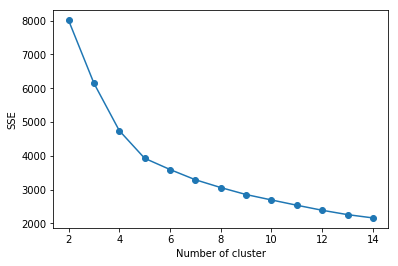

In [19]:
plt.figure()
plt.plot(sse.keys(),sse.values(), marker="o") #sse is dictionary 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Silhouette Method

In [22]:
np.random.seed(42)
sil_coef={}
for k in range (2,15): 
    cluster_wine=KMeans(k,n_jobs=-1)
    cluster_wine.fit_predict(X)
    sil_coef[k]=silhouette_score(X,cluster_wine.labels_,metric='euclidean')

#Higher Silhouette Coefficient score relates to a model with better defined clusters
sil_coef

{2: 0.27683341811345,
 3: 0.3204593687053995,
 4: 0.32528501433188645,
 5: 0.3018613847974683,
 6: 0.2629539404559059,
 7: 0.2666725879755624,
 8: 0.2532471167861663,
 9: 0.2457361501964905,
 10: 0.23334611958338564,
 11: 0.23093805178486246,
 12: 0.24200670351018355,
 13: 0.23046655245320097,
 14: 0.2287782739809718}

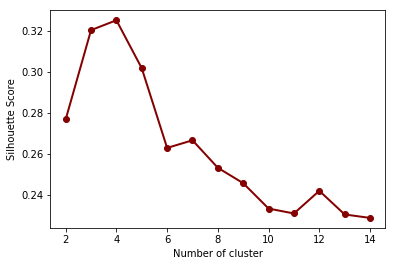

In [23]:
plt.figure()
plt.plot(sil_coef.keys(),sil_coef.values(), color='#840101',linewidth=2,marker='o')  
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

# Use k-Means Clustering

## Import the libraries

In [6]:
import numpy as np
import numpy.random as npr
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
%matplotlib inline

## Helper Functions

In [7]:
def plot_clust(X,W=None,z=None):
    if z is not None:
        if np.any(z<0):
            plt.scatter(X[z<0,0], X[z<0,1], marker="o", facecolors='none', edgecolor='black', alpha=0.3);
        if np.any(z>=0):
            plt.scatter(X[z>=0,0], X[z>=0,1], marker="o", c=z[z>=0], alpha=0.3);
    else:
        plt.scatter(X[:,0], X[:,1], marker="o", c='black', alpha=0.3);
    if W is not None:
        plt.scatter(W[:,0], W[:,1], marker="^", s=200, c=np.arange(W.shape[0]));
    else:
        plt.title("number of clusters = %d" % len(set(np.unique(z))-set([-1])));
    plt.show()

In [8]:
def generate_data(data_type = 1, n_samples = 1500, random_state = 170, k=3):
    n = 100
    d = 2
     
    if data_type == 1:
        X, z_true = make_blobs(n_samples=n_samples, random_state=random_state, centers=k)
    elif data_type == 2: #ellipsoidal data
        X, z_true = make_blobs(n_samples=n_samples, random_state=random_state, centers=k)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
    elif data_type == 3: #unequal variance
        X, z_true = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
    elif data_type == 4: #nonconvex cluster
        X, z_true = make_moons(n_samples, noise=.05, random_state=random_state)
    return X, z_true

## Generate Data

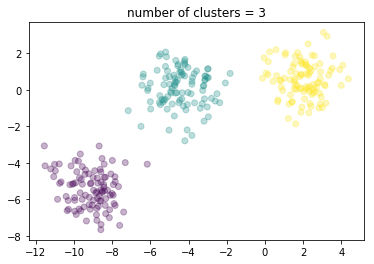

In [9]:
X, z_true = generate_data(data_type = 1, random_state = 170, n_samples = 300, k = 3)
n = len(X)
plot_clust(X,z=z_true)

## Initial Centroids

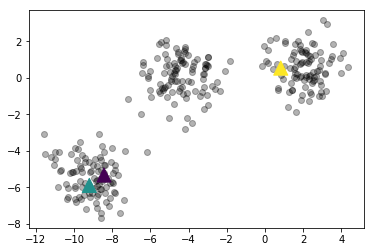

In [11]:
k = 3
npr.seed(2)

W = X[npr.choice(n, k, replace=False)]

plot_clust(X,W)

## Assign each object to closest mean

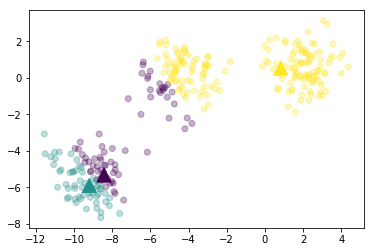

In [12]:
def update_z(X,W):
    dist2 = euclidean_distances(X, W)
    return np.argmin(dist2, axis=1)

z = update_z(X,W)
plot_clust(X,W,z)

## Recalculate cluster centres

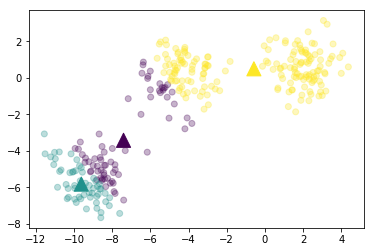

In [14]:
def update_W(X,z,W_old):
    # just being a bit careful about the case of a cluster with no points in it
    W = W_old.copy()
    for kk in range(k):
        W[kk] = np.mean(X[z==kk],axis=0)
    return W

W = update_W(X,z,W)
plot_clust(X,W,z)

## Repeat for 100 iterations

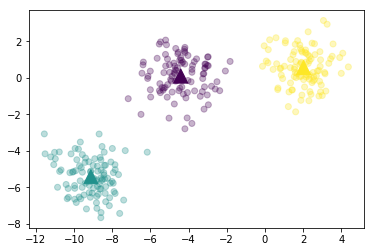

In [15]:
# better: loop until np.all(z_new == z)
for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
plot_clust(X,W,z)

# K-Means Problems

## Initialization Problem

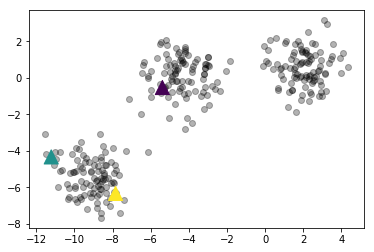

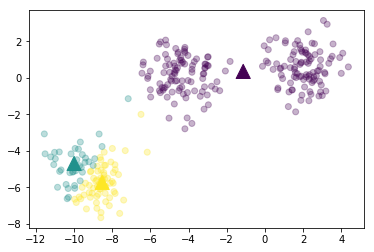

In [20]:
npr.seed(5)

X, z_true = generate_data(data_type = 1, random_state = 170, n_samples = 300, k = 3)
n = len(X)
k = 3
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

## K Value

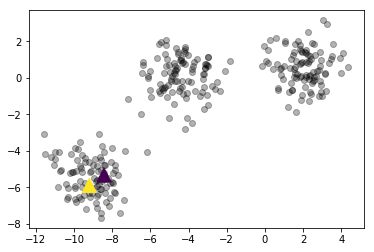

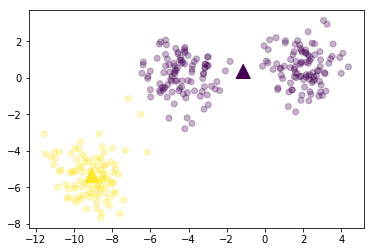

In [22]:
npr.seed(2)

X, z_true = generate_data(data_type = 1, random_state = 170, n_samples = 300, k = 3)
n = len(X)
k = 2
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

## Assuming Isotropic Clusters

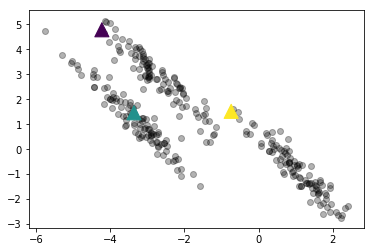

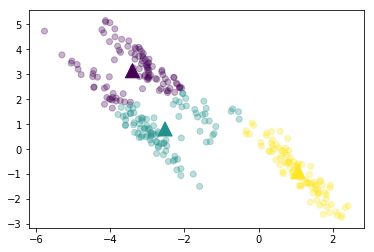

In [23]:
npr.seed(1)

X, z_true = generate_data(data_type = 2, random_state = 170, n_samples = 300, k = 3)
n = len(X)
k = 3
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

## Assuming Equal Variances

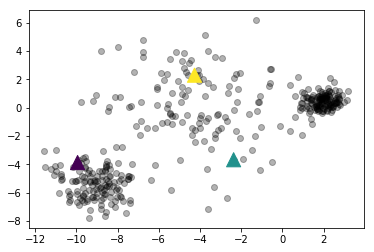

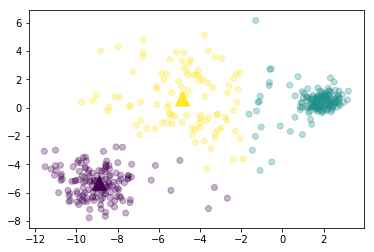

In [24]:
npr.seed(1)

X, z_true = generate_data(data_type = 3, random_state = 170, n_samples = 400, k = 3)
n = len(X)
k = 3
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

## Assuming Convex Clusters

<img src="lab8_plot_kmeans_digits_001.png">
source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

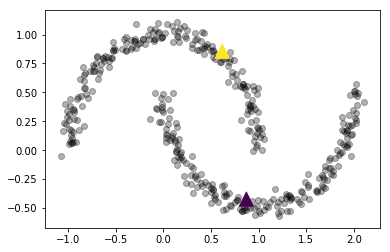

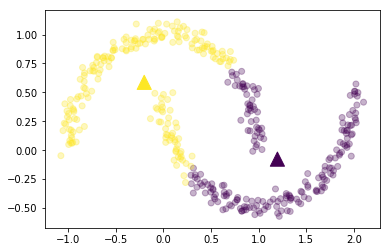

In [26]:
npr.seed(1)

X, z_true = generate_data(data_type = 4, random_state = 170, n_samples = 400, k = 2)
n = len(X)
k = 2
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)